# Предсказуемая история Титаника

Датасет по титанику является одним из многих "Hello world" датасетов в анализе данных. Не смотря на то что он достаточно небольшой, анализируя его можно поплескать ноги в категориалных переменных, тексте, непрерывных переменных, почситать всевозможные зависимости, а самое главное -- узнать, кто имеет набольшие шансы выжить крушение.

## Обзор

Данные взяты из [соревнования на kaggle](https://www.kaggle.com/c/titanic). 

Сами данные разделены на 2 части:

- Обучающий набор данных (train.csv)
- Тестовый набор данных (test.csv)
__Обучающий набор данных__ надо использовать для обучения моделей машинного обучения. Для обучения предоставлен известный исход каждого из пассажиров. Модель, которая будет построена в конечном итоге, принимает на вход “признаки” пол пассажира или класс. Также есть смысл воспользоваться [feature engineering-ом](https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/) чтобы создавать новые признаки.

__The test set__ should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

## Data Dictionary

|Variable	|Definition	 |Key                         |
|-----------|------------|--------------------------- |
|survival   |Survival	 |   0 = No, 1 = Yes          |
|pclass     |Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd |
|sex	    |Sex         |                            |	
|Age	    |Age in years|                            |
|sibsp      |№ of siblings / spouses aboard the Titanic| |	
|parch	    |№ of parents / children aboard the Titanic| |
|ticket     |Ticket number| |
|fare	    |Passenger fare| |
|cabin      |Cabin number| |
|embarked 	|Port of Embarkation|	C = Cherbourg, Q = Queenstown, S = Southampton|

## Variable Notes

__pclass__: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

__age__: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

__sibsp__: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

__parch__: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

## Загрузка данных

Для загрузки данных типично используется библиотека [pandas](https://pandas.pydata.org).

Если Вы знакомы с языком R, то Вам эта библиотека покажется очень знакомой, если нет, но это хороший старт для погуржания в анализ данных, поскольку схожими методами и сущностями обладает и Spark - библиотека для анализа больших данных.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv("data/train.csv")

Первым делом всегда стоит посмотреть на то, что за данные перед Вами. Это позволяет сделать команда `dtf.head(n)`, где `n` задает число строк, которые мы хотим вывести. Без аргументов, этот метод выводит первые 5 строк.

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Затем стоит посмотреть на количество данных. Для этого используем команду `dtf.shape`

In [4]:
train_df.shape

(891, 12)

В наших данных всего 891 наблюдение (пассажиры) и 12 признаков.

_NOTE: Договоримся по терминологии. **Наблюдения - это строки** в таблице, а **признаки - это переменные** фиксированного типа, которые описывают наблюдения. Т.е. наблюдения состоят из признаков. Если проводить параллели с геометрией, то **наблюдения - это точки** в многомерном пространстве, а **признки - это их координаты**._

In [7]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Наша задача узнать, что влияет на то, выживет человек или умрет.

_Что, на Ваш взгляд, может влиять на это?_

In [6]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

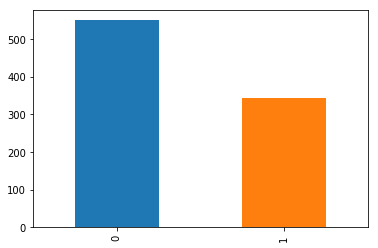

In [22]:
train_df.Survived.value_counts().plot(kind='bar')

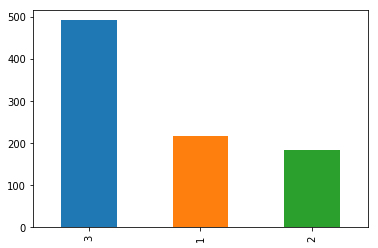

In [23]:
train_df.Pclass.value_counts().plot(kind='bar')

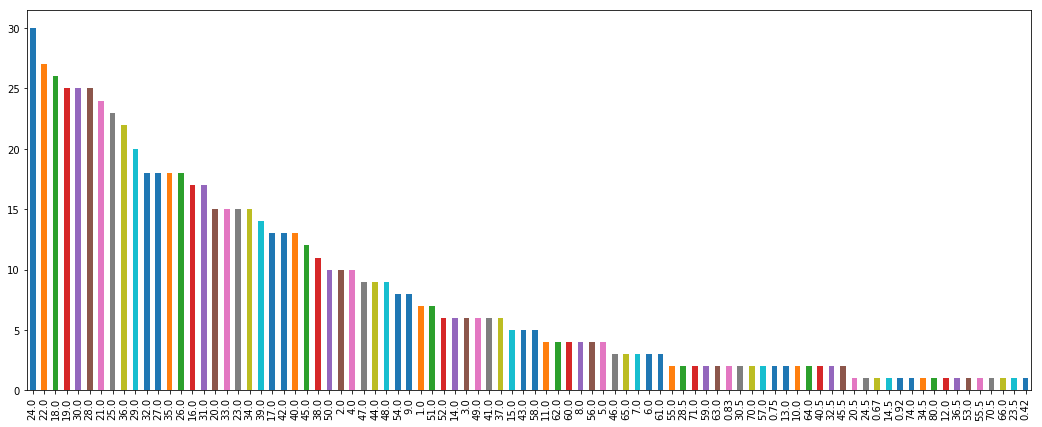

In [28]:
train_df.Age.value_counts().plot(kind='bar', figsize=(18, 7))

_Вопрос: почему у некоторых людей пропущен возраст? Что можно с этим сделать?_

In [30]:
# Количество детей и родителей связанных с человеком
train_df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Двольно много людей ехали одни.

Однако сказано, что 0 может обозначать также, что человек ехал с няней.

In [31]:
train_df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

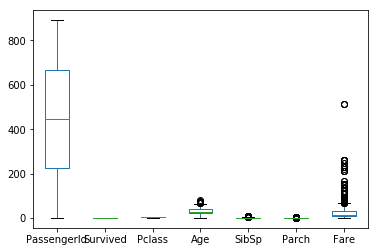

In [19]:
train_df.plot(kind='box')